<a href="https://colab.research.google.com/github/webabdullah/MACHING_LEARNING/blob/main/SentimentAnalysisNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data preparation

import pandas as pd 
import numpy as np 


#import nltk for natural language toolkit
import nltk 
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords


#import string, regex, , uniqcode
import re, string, unicodedata

#import sklearn preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#import tqdm 
from tqdm import tqdm 
tqdm.pandas()

#import beaurtiful soup 
from bs4 import BeautifulSoup

#save model 
import pickle 

#textblob
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install newsapi-python

In [ ]:
from textblob import TextBlob

In [ ]:
#dataset from newsapi.org
import requests
API_URL = 'https://newsapi.org/v2/everything'
api_key = '0b518b6063d84a74b275e309eea8923c'
def extract_data(q,language,pageSize):
    #define the parameter that are needed
    data = {'q': q,
           'language': language ,
#            'domain':domain,
            'pageSize': pageSize,
           'apiKey': api_key}
    
    #call the api and store into json format
    response = requests.get(API_URL, data)
    data = response.json()
    
    data = pd.DataFrame(data['articles'])
    
        
    # store into dataframe
#     df = pd.DataFrame.from_dict(data, orient='index')
    return data

In [ ]:
data = extract_data('DonaldTrump','en',100)

In [ ]:
# parse source name
test = data['source'].reset_index()

In [ ]:
for index in test.index :
   data['source'][index] = test['source'][index]['name']

In [ ]:
data.head(10)

,source,author,title,description,url,urlToImage,publishedAt,content
0,Reuters,Aakriti Bhalla,Twitter to hand over @POTUS account to Biden o...,Twitter Inc and Facebook Inc will transfer con...,https://uk.reuters.com/article/uk-usa-election...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-21T16:04:00Z,(Reuters) - Twitter Inc and Facebook Inc will ...
1,Reuters,Aakriti Bhalla,"Twitter, Facebook to hand over @POTUS account ...",Twitter Inc and Facebook Inc will transfer con...,https://www.reuters.com/article/us-usa-electio...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-21T17:52:00Z,(Reuters) - Twitter Inc and Facebook Inc will ...
2,Littlegreenfootballs.com,Charles Johnson,Trump's History of Condoning White Supremacy [...,YouTube\n\nDavid Duke. Charlottesville. Proud ...,http://littlegreenfootballs.com/article/50465_...,http://littlegreenfootballs.com/weblog/thumbna...,2020-11-27T18:17:38Z,This button leads to the main index of LGF Pag...
3,Japan Today,None,"Twitter, Facebook to hand over @POTUS account ...",Twitter Inc and Facebook Inc will transfer con...,https://japantoday.com/category/world/update-1...,None,2020-11-21T21:45:05Z,Twitter Inc and Facebook Inc will transfer con...
4,Vanity Fair,Caleb Ecarma,Obama: Misinformation Might Just Kill Off Demo...,Though Facebook helped propel his 2008 candida...,https://www.vanityfair.com/news/2020/11/obama-...,https://media.vanityfair.com/photos/5f96f0cab1...,2020-11-17T20:09:00Z,Just a few years after Facebook morphed from a...
5,Yahoo Entertainment,Tonya Pendleton,Tyson Foods sued after employee pool on COVID ...,Chicken plant workers were among the early cas...,https://news.yahoo.com/tyson-foods-sued-employ...,https://s.yimg.com/uu/api/res/1.2/Fte8QcYOmjfQ...,2020-11-19T23:21:32Z,Supervisors at a Tyson Foods plant in Waterloo...
6,Mediaite,Josh Feldman,Democrats Roundly Decry Trump Pardoning Michae...,President Donald Trump set off outrage Wednesd...,https://www.mediaite.com/news/democrats-roundl...,https://www.mediaite.com/wp-content/uploads/20...,2020-11-25T22:56:51Z,President Donald Trump set off outrage Wednesd...
7,TheGrio,Renee G,Biden will receive @POTUS account from Faceboo...,"Today, Twitter Inc. and Facebook Inc. announce...",http://thegrio.com/2020/11/21/biden-potus-face...,https://thegrio.com/wp-content/uploads/2020/11...,2020-11-21T19:45:09Z,"On inauguration day, the two social media gian..."
8,TheGrio,Ashley Terrell,Trump says ‘it’s not over’ after Supreme Court...,Despite the Supreme Court dismissing Trump’s a...,http://thegrio.com/2020/12/13/donald-trump-sup...,https://thegrio.com/wp-content/uploads/2020/12...,2020-12-13T18:11:57Z,62 percent of registered voters feel the elect...
9,The Times of Israel,None,Guests to White House Hanukkah party hesitant ...,While invitees are told they should wear masks...,https://www.timesofisrael.com/guests-to-white-...,https://static.timesofisrael.com/www/uploads/2...,2020-11-23T04:43:35Z,NEW YORK While the White House is moving forwa...


In [ ]:
#cleansing 
def preprocessing(text):
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    def remove_between_square_brackets(text):
        return re.sub('-\[[^]]*\]', '', text)
    def denoise_text(text):
        text = strip_html(text)
        text = remove_between_square_brackets(text)
        return text
    def remove_punctuation(text):
        return re.sub(r'[^\w\s]', '', text)
    def remove_non_ascii(text):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punctuation(text)
    text = remove_non_ascii(text)
    
    return text.lower()

In [ ]:
import copy

In [ ]:
df = copy.deepcopy(data[['description']])
df["description"]= df["description"].astype(str) 

In [ ]:
#apply the function
# df = data['content']
df['description'] = df['description'].progress_apply(preprocessing)

100%|██████████| 100/100 [00:00<00:00, 7319.39it/s]


In [ ]:
df.head(10)

,description
0,twitter inc and facebook inc will transfer con...
1,twitter inc and facebook inc will transfer con...
2,youtube\n\ndavid duke charlottesville proud bo...
3,twitter inc and facebook inc will transfer con...
4,though facebook helped propel his 2008 candida...
5,chicken plant workers were among the early cas...
6,president donald trump set off outrage wednesd...
7,today twitter inc and facebook inc announced t...
8,despite the supreme court dismissing trumps at...
9,while invitees are told they should wear masks...


In [ ]:
dataframe = df

In [ ]:
# lower casing
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe.head(10)

,description
0,twitter inc and facebook inc will transfer con...
1,twitter inc and facebook inc will transfer con...
2,youtube david duke charlottesville proud boys ...
3,twitter inc and facebook inc will transfer con...
4,though facebook helped propel his 2008 candida...
5,chicken plant workers were among the early cas...
6,president donald trump set off outrage wednesd...
7,today twitter inc and facebook inc announced t...
8,despite the supreme court dismissing trumps at...
9,while invitees are told they should wear masks...


In [ ]:
#punctual removal
dataframe['description'] = dataframe['description'].str.replace('[^\w\s]','')
dataframe.head(10)

,description
0,twitter inc and facebook inc will transfer con...
1,twitter inc and facebook inc will transfer con...
2,youtube david duke charlottesville proud boys ...
3,twitter inc and facebook inc will transfer con...
4,though facebook helped propel his 2008 candida...
5,chicken plant workers were among the early cas...
6,president donald trump set off outrage wednesd...
7,today twitter inc and facebook inc announced t...
8,despite the supreme court dismissing trumps at...
9,while invitees are told they should wear masks...


In [ ]:
# stopwords removal
stop = stopwords.words('english')
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['description'].head(10)

0    twitter inc facebook inc transfer control potu...
1    twitter inc facebook inc transfer control potu...
2    youtube david duke charlottesville proud boys ...
3    twitter inc facebook inc transfer control potu...
4    though facebook helped propel 2008 candidacy o...
5    chicken plant workers among early casualties c...
6    set outrage wednesday many expected pardon for...
7    today twitter inc facebook inc announced trans...
8    despite supreme court dismissing attempts over...
9    invitees told wear masks many fearful attendin...
Name: description, dtype: object

In [ ]:
# frequent words removal
freq = pd.Series(' '.join(dataframe['description']).split()).value_counts()[:10]
freq

house             10
administration    10
first             10
georgia           10
white             10
media             10
said              10
people            10
news              10
fraud             10
dtype: int64

In [ ]:
freq = list(freq.index)
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe.head(10)

,description
0,twitter inc facebook inc transfer control potu...
1,twitter inc facebook inc transfer control potu...
2,youtube david duke charlottesville proud boys ...
3,twitter inc facebook inc transfer control potu...
4,though facebook helped propel 2008 candidacy o...
5,chicken plant workers among early casualties c...
6,set outrage wednesday many expected pardon for...
7,today twitter inc facebook inc announced trans...
8,despite supreme court dismissing attempts over...
9,invitees told wear masks many fearful attendin...


In [ ]:
# rare words removal
rare_word = pd.Series(' '.join(dataframe['description']).split()).value_counts()[-20:]
rare_word

mic         1
arent       1
decisive    1
problem     1
leaving     1
duke        1
glenn       1
middle      1
limited     1
c           1
agency      1
award       1
holiday     1
longterm    1
shields     1
longer      1
possible    1
seized      1
ablaze      1
known       1
dtype: int64

In [ ]:
rare_word = list(rare_word.index)
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe.head(10)

,description
0,twitter inc facebook inc transfer control potu...
1,twitter inc facebook inc transfer control potu...
2,youtube david duke charlottesville proud boys ...
3,twitter inc facebook inc transfer control potu...
4,though facebook helped propel 2008 candidacy o...
5,chicken plant workers among early casualties c...
6,set outrage wednesday many expected pardon for...
7,today twitter inc facebook inc announced trans...
8,despite supreme court dismissing attempts over...
9,invitees told wear masks many fearful attendin...


In [ ]:
# spelling correction
dataframe['description'].apply(lambda x: str(TextBlob(x).correct()))
dataframe['description'].head(10)

0    twitter inc facebook inc transfer control potu...
1    twitter inc facebook inc transfer control potu...
2    youtube david duke charlottesville proud boys ...
3    twitter inc facebook inc transfer control potu...
4    though facebook helped propel 2008 candidacy o...
5    chicken plant workers among early casualties c...
6    set outrage wednesday many expected pardon for...
7    today twitter inc facebook inc announced trans...
8    despite supreme court dismissing attempts over...
9    invitees told wear masks many fearful attendin...
Name: description, dtype: object

In [ ]:
nltk.download('punkt')
#tokenization
TextBlob(dataframe['description'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['twitter', 'inc', 'facebook', 'inc', 'transfer', 'control', 'potus', 'account', 'administration', 'jan', '20', 'social', 'companies', 'said', 'saturday'])

In [ ]:
nltk.download('wordnet')
# lemmatization
from textblob import Word
dataframe['description'] = dataframe['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['description'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    election2020 donaldtrump joebiden vote2020 liv...
1    twitter inc facebook inc transfer control potu...
2    twitter inc facebook inc transfer control potu...
3    youtube david duke charlottesville proud boy h...
4    trump misleading post said claimed number 2020...
5    twitter inc facebook inc transfer control potu...
6    though facebook helped propel 2008 candidacy o...
7    chicken plant worker among early casualty coro...
8    denial reality dangerous institutionalized bec...
9    socalled computer glitch fix one michigan coun...
Name: description, dtype: object

In [ ]:
# data exploration
# basic feature extraction
# number of words
dataframe['word_count'] = dataframe['description'].apply(lambda x: len(str(x).split(" ")))
dataframe.head(10)

,description,word_count
0,election2020 donaldtrump joebiden vote2020 liv...,13
1,twitter inc facebook inc transfer control potu...,15
2,twitter inc facebook inc transfer control potu...,15
3,youtube david duke charlottesville proud boy h...,16
4,trump misleading post said claimed number 2020...,18
5,twitter inc facebook inc transfer control potu...,22
6,though facebook helped propel 2008 candidacy o...,26
7,chicken plant worker among early casualty coro...,15
8,denial reality dangerous institutionalized bec...,13
9,socalled computer glitch fix one michigan coun...,23


In [ ]:
# number of characters
dataframe['char_count'] = dataframe['description'].str.len()
dataframe.head(10)

,description,word_count,char_count
0,election2020 donaldtrump joebiden vote2020 liv...,13,118
1,twitter inc facebook inc transfer control potu...,15,106
2,twitter inc facebook inc transfer control potu...,15,106
3,youtube david duke charlottesville proud boy h...,16,128
4,trump misleading post said claimed number 2020...,18,133
5,twitter inc facebook inc transfer control potu...,22,159
6,though facebook helped propel 2008 candidacy o...,26,180
7,chicken plant worker among early casualty coro...,15,115
8,denial reality dangerous institutionalized bec...,13,115
9,socalled computer glitch fix one michigan coun...,23,149


In [ ]:
# number of stopwords
# stopword already trim
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head(10)

,description,word_count,char_count,stopwords
0,election2020 donaldtrump joebiden vote2020 liv...,13,118,0
1,twitter inc facebook inc transfer control potu...,15,106,0
2,twitter inc facebook inc transfer control potu...,15,106,0
3,youtube david duke charlottesville proud boy h...,16,128,1
4,trump misleading post said claimed number 2020...,18,133,0
5,twitter inc facebook inc transfer control potu...,22,159,0
6,though facebook helped propel 2008 candidacy o...,26,180,0
7,chicken plant worker among early casualty coro...,15,115,0
8,denial reality dangerous institutionalized bec...,13,115,0
9,socalled computer glitch fix one michigan coun...,23,149,0


In [ ]:
# labeling using polarity
# new dataframe
#new df after removed duplicate text
new_df = copy.deepcopy(dataframe)
new_df.head(10)

#sentiment labeling 
text = new_df.description
text.head(10)

0    election2020 donaldtrump joebiden vote2020 liv...
1    twitter inc facebook inc transfer control potu...
2    twitter inc facebook inc transfer control potu...
3    youtube david duke charlottesville proud boy h...
4    trump misleading post said claimed number 2020...
5    twitter inc facebook inc transfer control potu...
6    though facebook helped propel 2008 candidacy o...
7    chicken plant worker among early casualty coro...
8    denial reality dangerous institutionalized bec...
9    socalled computer glitch fix one michigan coun...
Name: description, dtype: object

In [ ]:
# labeling
#looping 
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    new_df.at[i,'sentiment']= sentiment
    if sentiment < 0.00 :
        sentimentclass = 'Negative'
        new_df.at[i, 'sentimentclass']= sentimentclass
    elif sentiment > 0.00 :
        sentimentclass = 'Positive'
        new_df.at[i, 'sentimentclass']= sentimentclass
    else :
        sentimentclass = ' Netral'
        new_df.at[i, 'sentimentclass']= sentimentclass

In [ ]:
new_df = new_df[['description','sentiment','sentimentclass']]

In [ ]:
new_df.head(10)

,description,sentiment,sentimentclass
0,election2020 donaldtrump joebiden vote2020 liv...,0.136364,Positive
1,twitter inc facebook inc transfer control potu...,0.033333,Positive
2,twitter inc facebook inc transfer control potu...,0.033333,Positive
3,youtube david duke charlottesville proud boy h...,0.200000,Positive
4,trump misleading post said claimed number 2020...,0.600000,Positive
5,twitter inc facebook inc transfer control potu...,0.033333,Positive
6,though facebook helped propel 2008 candidacy o...,0.016667,Positive
7,chicken plant worker among early casualty coro...,-0.333333,Negative
8,denial reality dangerous institutionalized bec...,-0.296429,Negative
9,socalled computer glitch fix one michigan coun...,0.000000,Netral


In [ ]:
# aggregation centiment class
#count sentiment 
sentiment = new_df.groupby(['sentimentclass'])['sentimentclass'].count()

#make dataframe that will be created a chart 
chart = pd.DataFrame(sentiment)
chart['cnt'] = chart['sentimentclass']
chart.drop(['sentimentclass'], axis = 1, inplace = True )
chart = chart.reset_index()

#make a proportion of the number of tweet of each sentiment 
chart['percent'] = chart['cnt']/chart['cnt'].sum()
chart

,sentimentclass,cnt,percent
0,Netral,22,0.22
1,Negative,28,0.28
2,Positive,50,0.50


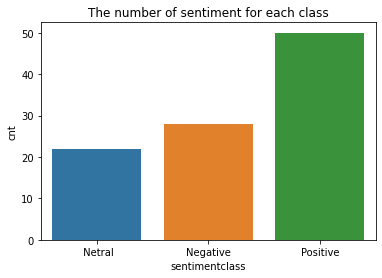

In [ ]:
# visualization
# barchart
#make a barchar
ax = sns.barplot(x= 'sentimentclass', y='cnt', data=chart)
ax = ax.set_title('The number of sentiment for each class') 

(-1.1020618127719948, 1.108101870989756, -1.311430283315655, 1.118071798158502)

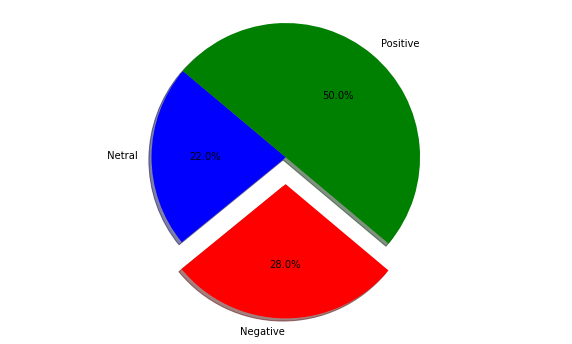

In [ ]:
# pie chart
colors = [ 'blue','red','green']
explode = (0, 0.2, 0)  # explode 1st slice
# Plot
figure = plt.figure(figsize= (10,6))
plt.pie(chart['cnt'], explode=explode, labels=chart['sentimentclass'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

In [ ]:
dataframe['source'] = data[['source']]

In [ ]:
cnt_source = dataframe.groupby(dataframe['source']).count()
cnt_source
chart = pd.DataFrame(cnt_source)
# chart['source'] = chart['source']
# chart.drop(['source'], axis = 1, inplace = True )
# chart = chart.reset_index()
chart['percent'] = chart['description']/chart['description'].sum()*100
chart = chart.reset_index()
chart
# chart

,source,description,word_count,char_count,stopwords,percent
0,Breitbart News,1,1,1,1,1.0
1,CleanTechnica,1,1,1,1,1.0
2,Entornointeligente.com,1,1,1,1,1.0
3,Foreign Policy,1,1,1,1,1.0
4,Freerepublic.com,67,67,67,67,67.0
5,IOL,1,1,1,1,1.0
6,Independent,1,1,1,1,1.0
7,Japan Today,1,1,1,1,1.0
8,Littlegreenfootballs.com,1,1,1,1,1.0
9,Mediaite,1,1,1,1,1.0


In [ ]:
#text = happy.Description
#make a wordcloud 
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
#define positive and negatif
positive = df.loc[new_df['sentimentclass']=='Positive' ]
negative  = df.loc[new_df['sentimentclass']=='Negative' ]
positive.head(20)

,description,word_count,char_count,stopwords,source
0,election2020 donaldtrump joebiden vote2020 liv...,13,118,0,YouTube
1,twitter inc facebook inc transfer control potu...,15,106,0,Reuters
2,twitter inc facebook inc transfer control potu...,15,106,0,Reuters
3,youtube david duke charlottesville proud boy h...,16,128,1,Littlegreenfootballs.com
4,trump misleading post said claimed number 2020...,18,133,0,The Daily Dot
5,twitter inc facebook inc transfer control potu...,22,159,0,Japan Today
6,though facebook helped propel 2008 candidacy o...,26,180,0,Vanity Fair
11,set outrage wednesday many expected pardon for...,24,177,0,Mediaite
12,today twitter inc facebook inc announced trans...,24,188,0,TheGrio
15,live update first poll close voter cast ballot...,26,142,0,WESH Orlando


In [ ]:
all_positive = "".join(positive['description'].values)
all_negative = "".join(negative['description'].values)
# positive[['description']].values

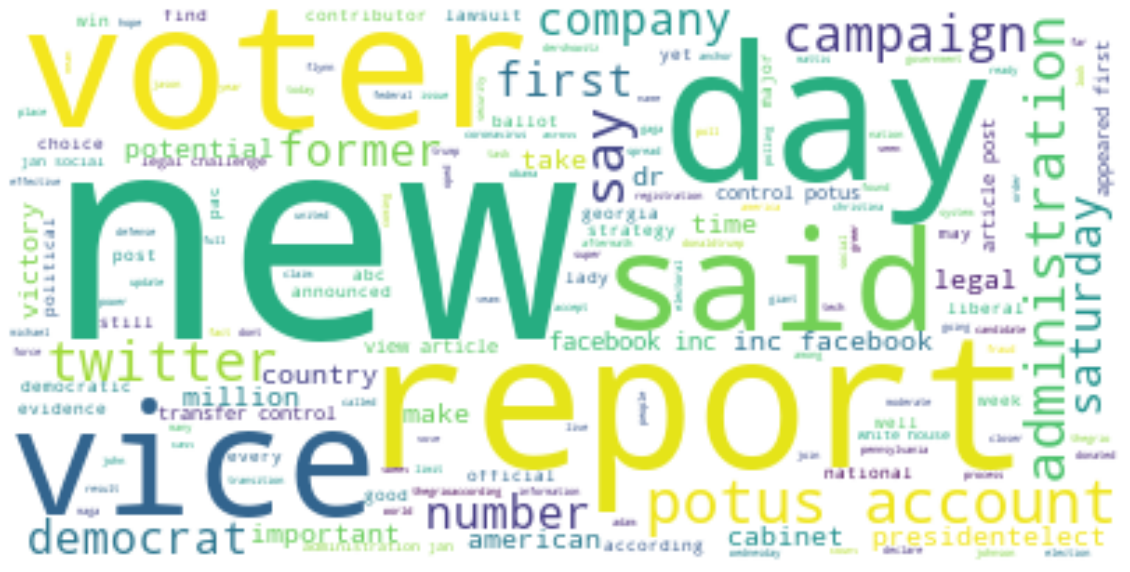

In [ ]:
#word cloud
#positive
plt.figure(figsize=(20,20))
create_word_cloud(all_positive)

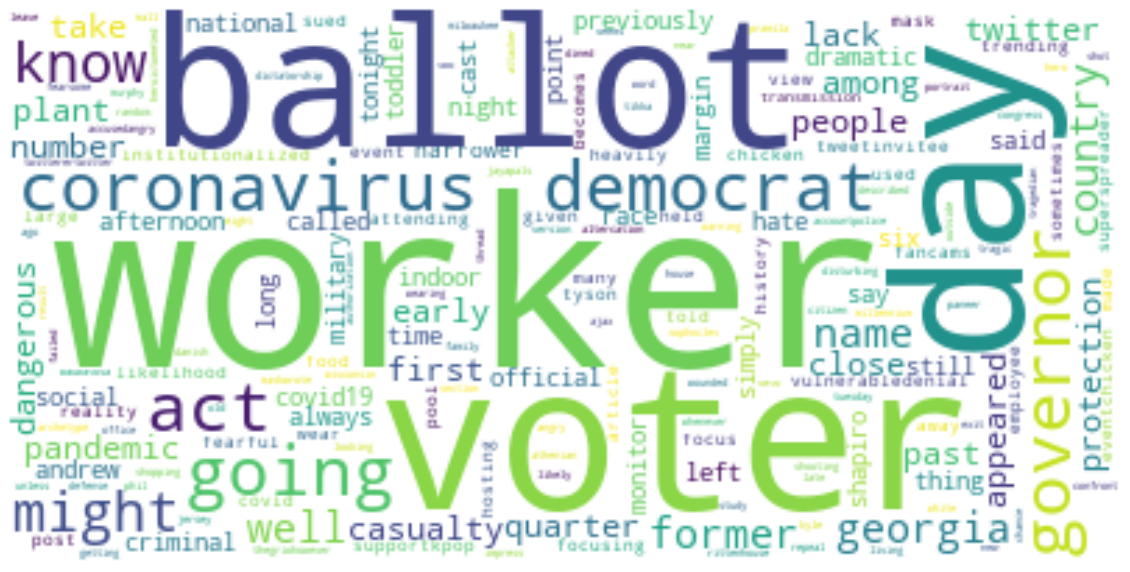

In [ ]:
#negative
plt.figure(figsize=(20,20))
create_word_cloud(all_negative)